Mounted at /content/drive


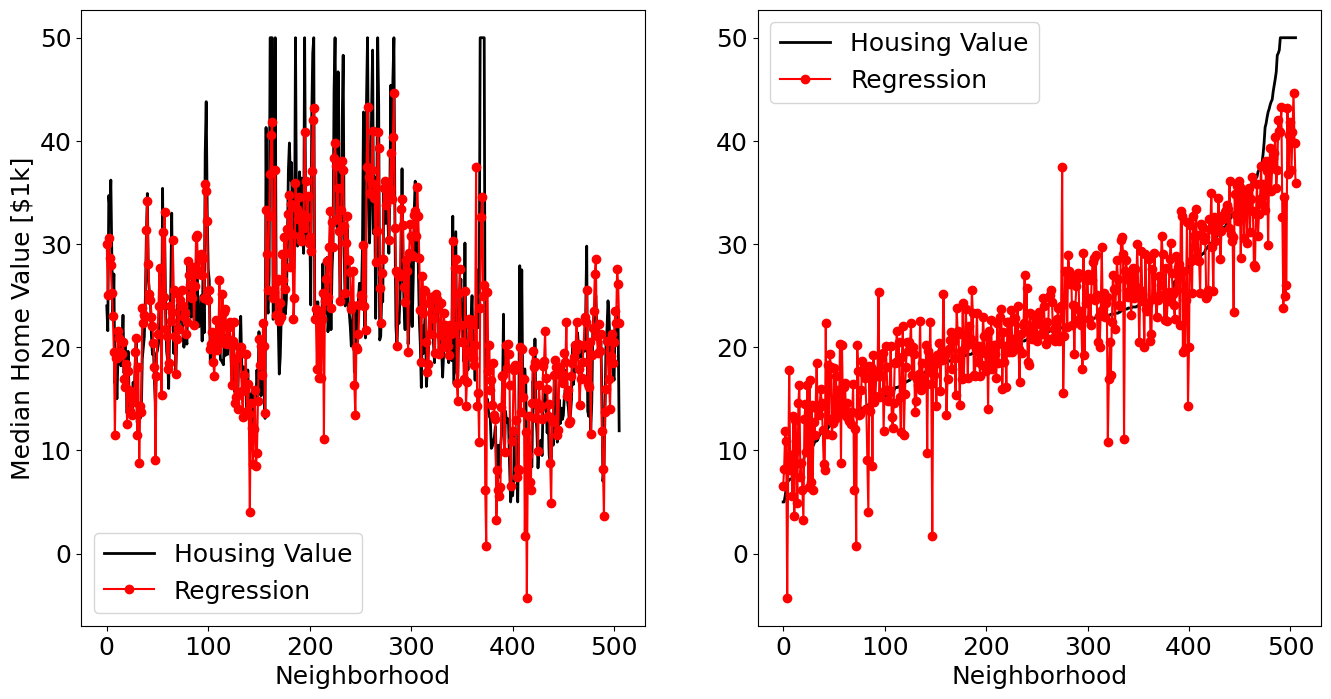

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# important step to locate and give access to drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Classroom/DataDrivenModeling/ClassNotes/DATA/')


# Load dataset
H = np.loadtxt(os.path.join('housing.data'))
#H = np.loadtxt(os.path.join('..','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

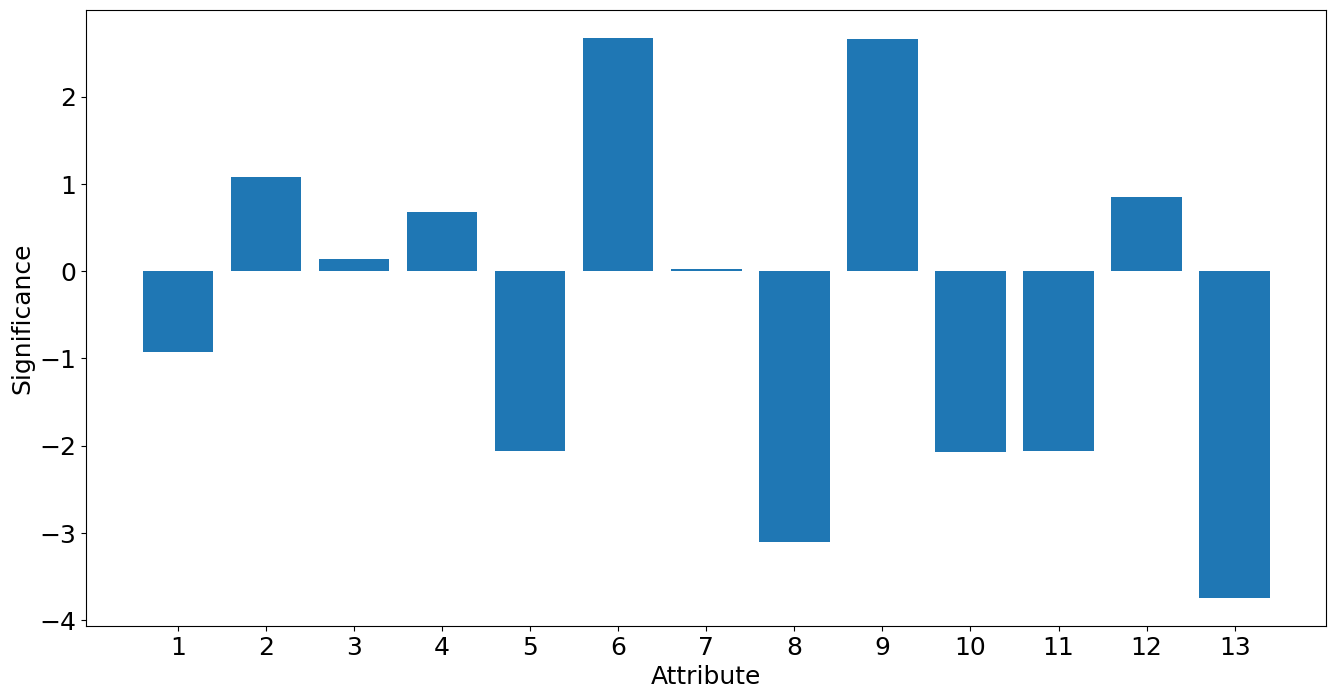

In [2]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()
